In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [285]:
class percepton():
    """eta = learning rate, n_iter = number of iterations, 
    errors = number of misclassificatiosn in every epoch,
    w = weights after fiting
    """
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        """Fit training data
        X: Shape = [n_samples, n_features]
        y = n_samples(target values)
        """
        self.w = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0 # error initialized to zero in the begining
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi)) #learning rate * target_value - predicted value
                self.w[1:] += update * xi
                self.w[0] += update
                errors += int(update!=0)
            self.errors_.append(errors)
        return self
        
    def net_input(self, X):
        """Calculate net Input"""
        return np.dot(X, self.w[1:]) + self.w[0]
    
    def predict(self, X):
        """Return class label after uinit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
                
                
        

In [286]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [287]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [288]:
y = df.iloc[0:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [289]:
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [290]:
X = df.iloc[0:100, [0, 2]].values

In [291]:
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')

In [292]:
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='*', label='versicolor')

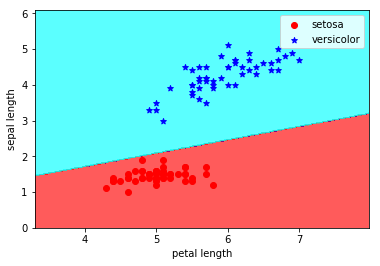

In [293]:
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper right')
plt.show()

In [294]:
ppn = percepton(0.1, 10)

In [295]:
ppn.fit(X, y)

In [296]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

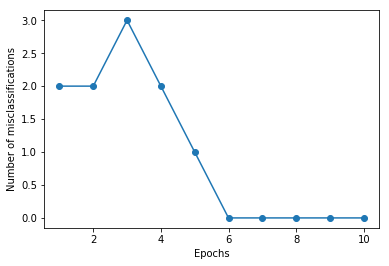

In [297]:
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

***Scikit-learn implementation.***

In [298]:
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [299]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]

In [300]:
y = iris.target

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [302]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [303]:
from sklearn.linear_model import perceptron
from sklearn.metrics import confusion_matrix, accuracy_score
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)
ppn = percepton(n_iter=1000, eta=0.01)
ppn.fit(X_train_std, y_train)

In [304]:
y_pred = ppn.predict(X_test_std)

In [305]:
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 27


In [306]:
# print('Accuracy score: %2f' % acrruracy_score(y_test, y_pred))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.40
